# data loading

In [46]:
!pip install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 412.0 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 839.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 64.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 38.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 4.9 MB/s eta

## Berkeley Data Loading & Preprocessing

In [6]:
#!pip install evaluate

import pandas as pd
import nltk
import matplotlib 
from transformers import DistilBertForSequenceClassification, TrainingArguments, Trainer
import evaluate
import numpy as np
import torch.nn as nn


In [45]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [7]:



berkeley = pd.read_parquet("hf://datasets/ucberkeley-dlab/measuring-hate-speech/measuring-hate-speech.parquet")

columns_relevant =  ['hatespeech', 'text', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern',
'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_religion_atheist', 'target_religion_buddhist',
'target_religion_christian', 'target_religion_hindu', 'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 
'target_religion_other', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_undocumented', 
'target_gender_men', 'target_gender_non_binary', 'target_gender_transgender_men', 'target_gender_transgender_unspecified',
'target_gender_transgender_women', 'target_gender_women', 'target_sexuality_bisexual', 'target_sexuality_gay', 'target_sexuality_lesbian',
'target_sexuality_straight', 'target_sexuality_other', 'target_disability_physical', 'target_disability_cognitive',
'target_disability_neurological', 'target_disability_visually_impaired', 'target_disability_hearing_impaired', 'target_disability_unspecific',
'target_disability_other']

berkeley_columns_relevant = berkeley[columns_relevant]
berkeley_columns_relevant.head()

,hatespeech,text,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,target_religion_atheist,...,target_sexuality_lesbian,target_sexuality_straight,target_sexuality_other,target_disability_physical,target_disability_cognitive,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other
0,0.0,Yes indeed. She sort of reminds me of the elde...,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,The trans women reading this tweet right now i...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,It is about time for all illegals to go back t...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
lgb_cols = [ 'target_sexuality_bisexual', 'target_sexuality_gay', 'target_sexuality_lesbian', 'target_sexuality_other']

t_cols = ['target_gender_transgender_men', 'target_gender_transgender_unspecified','target_gender_transgender_women']

disability_cols = ['target_disability_physical', 'target_disability_cognitive', 'target_disability_neurological',
'target_disability_visually_impaired', 'target_disability_hearing_impaired', 'target_disability_unspecific', 'target_disability_other']

immigrant_cols = ['target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_undocumented']


berkeley_columns_relevant.loc[:, 'Transgender'] = berkeley_columns_relevant[t_cols].any(axis=1)
berkeley_columns_relevant.loc[:, 'LGB+'] = berkeley_columns_relevant[lgb_cols].any(axis=1)
berkeley_columns_relevant.loc[:, 'Disabled'] = berkeley_columns_relevant[disability_cols].any(axis=1)
berkeley_columns_relevant.loc[:, 'Immigrant'] = berkeley_columns_relevant[immigrant_cols].any(axis=1)


berkeley_columns_relevant = berkeley_columns_relevant.copy()
berkeley_columns_relevant.rename(columns={'target_race_asian': 'Asian', 'target_race_black': 'Black', 'target_race_latinx': 'Latinx', 
'target_race_middle_eastern': 'Middle Eastern', 'target_race_pacific_islander': 'Pacific Islander', 'target_race_white': 'White', 
'target_religion_atheist': 'Atheist', 'target_religion_buddhist': 'Buddhist', 'target_religion_christian':'Christian','target_religion_hindu': 'Hindu', 
'target_religion_jewish': 'Jewish','target_religion_mormon': 'Mormon',
'target_religion_muslim': 'Muslim', 'target_religion_other': 'Other Religion', 'target_gender_men': 'Men', 
'target_gender_non_binary': 'Non-Binary', 'target_gender_women': 'Women', 'target_race_native_american': 'Native American',
}, inplace=True)

berkeley_compressed = berkeley_columns_relevant.drop(lgb_cols + t_cols + disability_cols + immigrant_cols, axis=1)

berkeley_compressed['hatespeech'] = berkeley_compressed['hatespeech'].apply(lambda x: 1 if x > 0 else 0)
berkeley_compressed

/scratch/slurm-14064/ipykernel_76594/3703324346.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berkeley_columns_relevant.loc[:, 'LGBTQ+'] = berkeley_columns_relevant[lgbtq_cols].any(axis=1)
/scratch/slurm-14064/ipykernel_76594/3703324346.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berkeley_columns_relevant.loc[:, 'Disabled'] = berkeley_columns_relevant[disability_cols].any(axis=1)
/scratch/slurm-14064/ipykernel_76594/3703324346.py:14: SettingWithCopyWarning: 
A value is trying to be set on a 

,hatespeech,text,Asian,Black,Latinx,Middle Eastern,Native American,Pacific Islander,White,Atheist,...,Jewish,Muslim,Other Religion,Men,Non-Binary,Women,LGBTQ+,Disabled,Immigrant,Christianity
0,0,Yes indeed. She sort of reminds me of the elde...,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,The trans women reading this tweet right now i...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,It is about time for all illegals to go back t...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


,Asian,Black,Latinx,Middle Eastern,Native American,Pacific Islander,White,Atheist,Buddhist,Christianity,Hindu,Jewish,Muslim,Other Religion,Men,Non-Binary,Women,LGBTQ+,Disabled,Immigrant
Nonhate,3374,9200,4127,4986,2140,1662,6105,699,527,5974,943,2527,7704,1729,6991,1632,17196,17462,1351,5607
Hate,3651,13699,4370,4464,679,696,3692,254,202,1236,342,4397,4805,599,3038,484,10693,9455,2365,5586


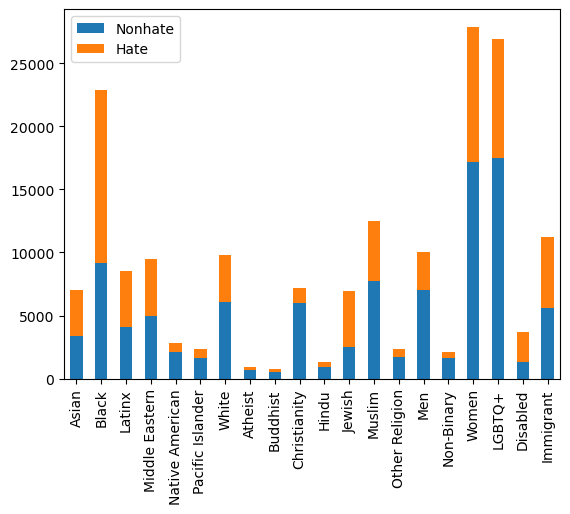

In [9]:
columns_to_sum = ['Asian', 'Black', 'Latinx', 'Middle Eastern', 'Native American', 'Pacific Islander', 'White', 'Atheist', 'Buddhist', 'Christian','Hindu', 'Jewish', 'Muslim', 'Mormon', 'Other Religion', 'Men', 'Non-Binary', 'Women', 'LGB+','Transgender', 'Disabled', 'Immigrant']






hate_counts = berkeley_compressed[columns_to_sum].where(berkeley_compressed['hatespeech'] == 1).sum().to_frame().T
nonhate_counts = berkeley_compressed[columns_to_sum].where(berkeley_compressed['hatespeech'] == 0).sum().to_frame().T

target_counts = pd.concat([nonhate_counts, hate_counts], ignore_index=True)
target_counts.index = ['Nonhate', 'Hate']


target_counts.T.plot.bar(stacked=True)
target_counts.head()


## arabic data

In [30]:
arabic_data = pd.read_csv('levantine_arabic.csv',sep = ",")
arabic_data

,Tweet,Class,english
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive,"Minister Gebran Bassil, crown your head, O Sco..."
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal,"My friend, you are a university student. The g..."
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal,Lebanon’s interest begins with extracting oil ...
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,"Walid Jumblatt, writer of wisdom, filthy"
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive,What do you think about the word “pig” that is...
...,...,...,...
5841,أمير المليشيا مش خائن,normal,The militia prince is not a traitor
5842,صدقت يناسبك جدا جدا,normal,"You are right, it suits you very well"
5843,لبخليني حب باسيل شغلتين,normal,Basil's love leaves me with two things
5844,ليش تيوس الإمارت والسعودية مع السوريين واليمني...,hate,Why are the goats of the Emirates and Saudi Ar...


## german data

In [ ]:
german_data = pd.read_csv('german.csv',sep = ",")
german_data

## korean data

In [ ]:
korean_data = pd.read_csv('korean.csv',sep = ",")
korean_data

### visualization

In [ ]:
korean_hate_counts = korean_train['hate'].value_counts()
korean_hate_counts.plot.bar()

# training BERT

In [10]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from datasets import Dataset, Features, Value, ClassLabel, Sequence
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoConfig

#berkeley_compressed = berkeley_compressed.rename(columns={'hatespeech': 'label'})
berkeley_compressed[demographic_labels] = berkeley_compressed[demographic_labels].astype(int)
berkeley_compressed['labels'] = berkeley_compressed[demographic_labels].astype(float).values.tolist()
train_test = Dataset.from_pandas(berkeley_compressed).train_test_split(test_size=0.1)



#tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")




shortened_berkeley = berkeley_compressed.head(100)
shortened_berkeley["labels"] = shortened_berkeley["labels"].apply(lambda x: np.array(x, dtype=np.int64))
shortened_berkeley = shortened_berkeley[["text", "labels"]]
torch.cuda.empty_cache()

features = Features({
    "text": Value("string"),
    "labels": Sequence(Value("float32"))  
})



shortened_train_test = Dataset.from_pandas(berkeley_compressed).train_test_split(test_size=0.1)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


def preprocess(examples):
    tokenized = tokenizer(examples["text"], truncation=True) 
    tokenized["labels"] = examples["labels"]
    return tokenized

tokenized_data = train_test.map(preprocess, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

shortened_tokenized_data = shortened_train_test.map(preprocess, batched = True)


/scratch/slurm-14064/ipykernel_76594/3649219314.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortened_berkeley["labels"] = shortened_berkeley["labels"].apply(lambda x: np.array(x, dtype=np.int64))


Map:   0%|          | 0/122000 [00:00<?, ? examples/s]

Map:   0%|          | 0/13556 [00:00<?, ? examples/s]

Map:   0%|          | 0/122000 [00:00<?, ? examples/s]

Map:   0%|          | 0/13556 [00:00<?, ? examples/s]

In [11]:
shortened_berkeley = berkeley_compressed.head(100)
shortened_berkeley["labels"] = shortened_berkeley["labels"].apply(lambda x: np.array(x, dtype=np.int64))
shortened_berkeley = shortened_berkeley[["text", "labels"]]
torch.cuda.empty_cache()

features = Features({
    "text": Value("string"),
    "labels": Sequence(Value("float32"))  
})

/scratch/slurm-14064/ipykernel_76594/2049454021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortened_berkeley["labels"] = shortened_berkeley["labels"].apply(lambda x: np.array(x, dtype=np.int64))


In [24]:


model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=20, problem_type="multi_label_classification")


accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.sigmoid(torch.tensor(logits))
    preds = (probs > 0.5).int().numpy()
    return {
        "f1_micro": f1.compute(predictions=preds, references=labels, average="micro")["f1"],
        "precision_micro": precision.compute(predictions=preds, references=labels, average="micro")["precision"],
        "recall_micro": recall.compute(predictions=preds, references=labels, average="micro")["recall"],
    }

training_args = TrainingArguments(
    output_dir="hatespeech_classifier",
    learning_rate=4e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
    warmup_ratio=0.1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    #compute_metrics=compute_metrics,
)
#torch.mps.empty_cache()

trainer.train()

#results = trainer.evaluate(tokenized_data['test'])
#pd.DataFrame(results, index=['Fine-tuned DistilBERT'])

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/scratch/slurm-14064/ipykernel_76594/1718452880.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss
1,0.093100,0.092587
2,0.084400,0.089761
3,0.078600,0.090460
4,0.072900,0.093913
5,0.065400,0.097674


TrainOutput(global_step=38125, training_loss=0.0879882236918465, metrics={'train_runtime': 3062.4352, 'train_samples_per_second': 199.188, 'train_steps_per_second': 12.449, 'total_flos': 1.5802946869776e+16, 'train_loss': 0.0879882236918465, 'epoch': 5.0})

# classifying text

## general

In [43]:
def predict_category(text):
    predict_input = tokenizer.encode(text,
    truncation=True,
    padding=True,
    return_tensors="tf")
    output = model(predict_input)[0]
    prediction_value = tf.argmax(output, axis=1).numpy()[0]
    return prediction_value

In [ ]:
unlabelled_data = unlabelled_df[‘data’].to_list()
len(unlabelled_data)

In [ ]:
unlabelled_predictions = []
for data in unlabelled_data:
    unlabelled_predictions.append(predict_category(data))
    prediction_df = pd.DataFrame({
        "data": unlabelled_data,
        "labels": unlabelled_predictions,
    })
prediction_df.to_csv("model_prediction.csv", index=False)

## arabic

In [35]:
arabic_en = arabic_data['english'].to_list()
len(arabic_en)

5846

In [44]:
arabic_predictions = []
for data in arabic_en:
    arabic_predictions.append(predict_category(data))
    arabic_prediction_df = pd.DataFrame({
        "english": arabic_en,
        "labels": arabic_predictions,
    })
prediction_df.to_csv("model_prediction.csv", index=False)

TypeError: list indices must be integers or slices, not tuple

## german

In [ ]:
german_list = german[‘english’].to_list()
len(korean_list)

## korean

In [ ]:
korean_list = korean[‘english’].to_list()
len(korean_list)

# practice code

In [22]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=shortened_tokenized_data["train"],
    eval_dataset=shortened_tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)
#torch.mps.empty_cache()
trainer.train()



#result = trainer.evaluate(shortened_tokenized_data['test'])
#short_results = []
#for item in shortened_tokenized_data['test']:
    #result = trainer.evaluate(item)
    #print(result)
    #short_results.append(result)
    
pd.DataFrame(short_results, index=['Fine-tuned DistilBERT'])

/scratch/slurm-14064/ipykernel_76594/40129132.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


ValueError: Predictions and/or references don't match the expected format.
Expected format: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)},
Input predictions: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]],
Input references: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

In [6]:
shortened_berkeley = berkeley_compressed.head(100)
shortened_berkeley["labels"] = shortened_berkeley["labels"].apply(lambda x: np.array(x, dtype=np.int64))
shortened_berkeley = shortened_berkeley[["text", "labels"]]
torch.cuda.empty_cache()

features = Features({
    "text": Value("string"),
    "labels": Sequence(Value("float32"))  
})

NameError: name 'np' is not defined

In [39]:
train_test_short = Dataset.from_pandas(shortened_berkeley, features=features).train_test_split(test_size=0.1)
tokenizer_short = AutoTokenizer.from_pretrained("distilbert-base-uncased")


In [40]:
def preprocess(examples):
    tokenized = tokenizer_short(examples["text"], truncation=True, padding=True) 

    labels = examples["labels"]
    labels = np.array(labels).astype(np.float32)
    
    tokenized["labels"] = torch.tensor(labels, dtype=torch.float)
    
    return tokenized

In [41]:
tokenized_data_short = train_test_short.map(preprocess, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer_short)

Map:   0%|          | 0/90 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

In [19]:
print(tokenized_data_short["train"][0])
config = AutoConfig.from_pretrained(
    "distilbert-base-uncased",
    num_labels=20,
    problem_type="multi_label_classification"
)


{'text': "Question: These 4 broads who criticize America, what country did they flee to get here? And now they want to make OUR America like THEIR former HELL HOLE. I don't think so!!!!!!!!!!  Let them explain their GRATITUDE for letting them in OUR country.", 'labels': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'input_ids': [101, 3160, 1024, 2122, 1018, 5041, 2015, 2040, 6232, 4697, 2637, 1010, 2054, 2406, 2106, 2027, 10574, 2000, 2131, 2182, 1029, 1998, 2085, 2027, 2215, 2000, 2191, 2256, 2637, 2066, 2037, 2280, 3109, 4920, 1012, 1045, 2123, 1005, 1056, 2228, 2061, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 2292, 2068, 4863, 2037, 15531, 2005, 5599, 2068, 1999, 2256, 2406, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [20]:
model_short = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    config=config
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:

f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")

In [23]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits = torch.tensor(logits, dtype=torch.float).cpu()  
    labels = torch.tensor(labels, dtype=torch.float).cpu()

    probs = torch.sigmoid(torch.tensor(logits))
    preds = (probs > 0.5).int().numpy()
    labels = np.array(labels)

  
    return {
        "f1_micro": f1.compute(predictions=preds, references=labels, average="micro")["f1"],
        "precision_micro": precision.compute(predictions=preds, references=labels, average="micro")["precision"],
        "recall_micro": recall.compute(predictions=preds, references=labels, average="micro")["recall"],
    }

In [29]:


training_args = TrainingArguments(
    output_dir="hatespeech_classifier",
    learning_rate=4e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
    warmup_ratio=0.1
)

trainer_short = Trainer(
    model=model_short,
    args=training_args,
    train_dataset=tokenized_data_short["train"],
    eval_dataset=tokenized_data_short["test"],
    tokenizer=tokenizer_short,
    data_collator=data_collator,
    #compute_metrics=compute_metrics,
)

for batch in trainer_short.get_train_dataloader():
    print(batch)
    break
trainer_short.train()




/scratch/slurm-14062/ipykernel_78845/2188472962.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_short = Trainer(
Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


{'labels': tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],

Epoch,Training Loss,Validation Loss
1,No log,0.448916


TrainOutput(global_step=6, training_loss=0.4757084051767985, metrics={'train_runtime': 20.6264, 'train_samples_per_second': 4.363, 'train_steps_per_second': 0.291, 'total_flos': 2585496315600.0, 'train_loss': 0.4757084051767985, 'epoch': 1.0})

In [30]:
for batch in trainer_short.get_train_dataloader():
    print(batch)
    break
trainer_short.train()

{'labels': tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],

Epoch,Training Loss,Validation Loss
1,No log,0.411055


TrainOutput(global_step=6, training_loss=0.43312708536783856, metrics={'train_runtime': 21.1811, 'train_samples_per_second': 4.249, 'train_steps_per_second': 0.283, 'total_flos': 2585496315600.0, 'train_loss': 0.43312708536783856, 'epoch': 1.0})

In [27]:
#for model_inputs, gold_standards in evaluation_dataset:
 #   predictions = model(model_inputs)
#  metric.add_batch(references=gold_standards, predictions=predictions)
#metric.compute()


accuracy = evaluate.load('accuracy')

#accuracy.description


'\nAccuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:\nAccuracy = (TP + TN) / (TP + TN + FP + FN)\n Where:\nTP: True positive\nTN: True negative\nFP: False positive\nFN: False negative\n'

In [25]:
#for model_inputs, gold_standards in evaluation_dataset:
 #   predictions = model(model_inputs)
#  metric.add_batch(references=gold_standards, predictions=predictions)
#metric.compute()


accuracy = evaluate.load('accuracy')


results = trainer_short.evaluate(tokenized_data_short['test'])
pd.DataFrame(results, index=['Fine-tuned DistilBERT'])

/scratch/slurm-14062/ipykernel_78845/1874909447.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  probs = torch.sigmoid(torch.tensor(logits))


ValueError: Predictions and/or references don't match the expected format.
Expected format: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)},
Input predictions: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]],
Input references: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]]